## Tutorial: CommonRoad Lanelet-based Curvilinear Coordinatesystem

This tutorial shows you how to create a curvilinear coordinate system from lanelets using CommonRoad scenarios. We start with opening a CommonRoad XML file.

### Step 1: Read a CommonRoad scenario

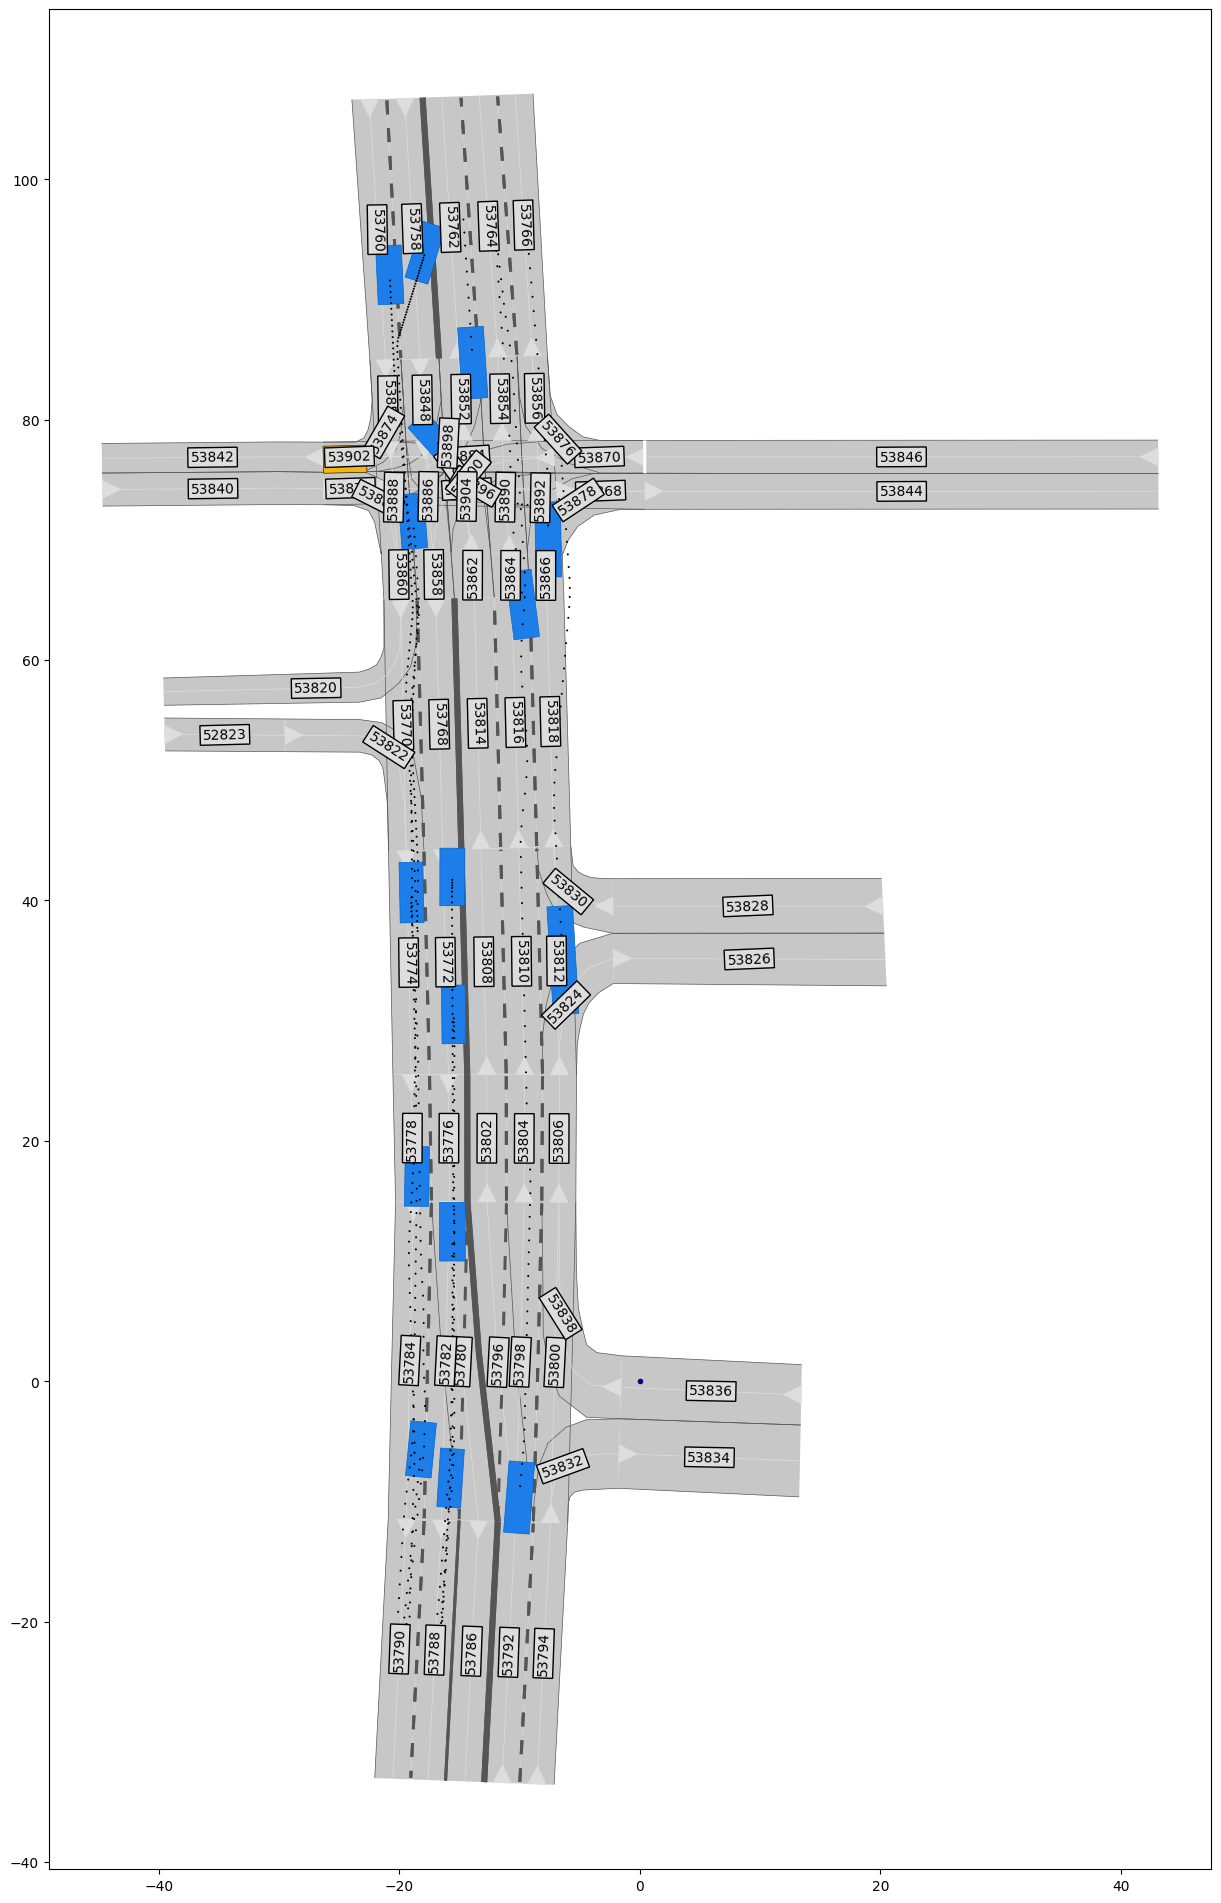

In [6]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# load the CommonRoad scenario, note that you might have to modify the path to the CommonRoad scenario!
file_path = os.path.join(os.getcwd(), '../example_scenarios/USA_Peach-2_1_T-1.xml')

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario in the initial time step
plt.figure(figsize=(15, 30), dpi=100)
draw_object(scenario, draw_params={'time_begin': 0, 'scenario': {'lanelet_network': {
                        'lanelet': {'show_label': True}}}})
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()

### Step 2: Create the coordinate system

We will merge the lanelets 53792-53796-53802-53808-53814-53862-53894-53902-53842 and use this new lanelet as coordinate system.

In [7]:
from commonroad.scenario.lanelet import Lanelet
from commonroad_ccosy.lanelet_ccosy.lanelet_ccosy import LaneletCoordinateSystem

starting_lanelet_id = 53792
lanelet_ids_to_merge = [53796 ,53802 ,53808 ,53814 ,53862 ,53894 ,53902 ,53842]
lanelet_network = scenario.lanelet_network

lanelet = lanelet_network.find_lanelet_by_id(starting_lanelet_id)
for lanelet_id_to_merge in lanelet_ids_to_merge:
    lanelet_to_merge = lanelet_network.find_lanelet_by_id(lanelet_id_to_merge)
    lanelet = Lanelet.merge_lanelets(lanelet, lanelet_to_merge)
lanelet_ccosy = LaneletCoordinateSystem(lanelet)

### Step 3: Visualize the coordinate system

We can visualize the segments of the coordinate system with the commonroad_ccosy.visualization module. 

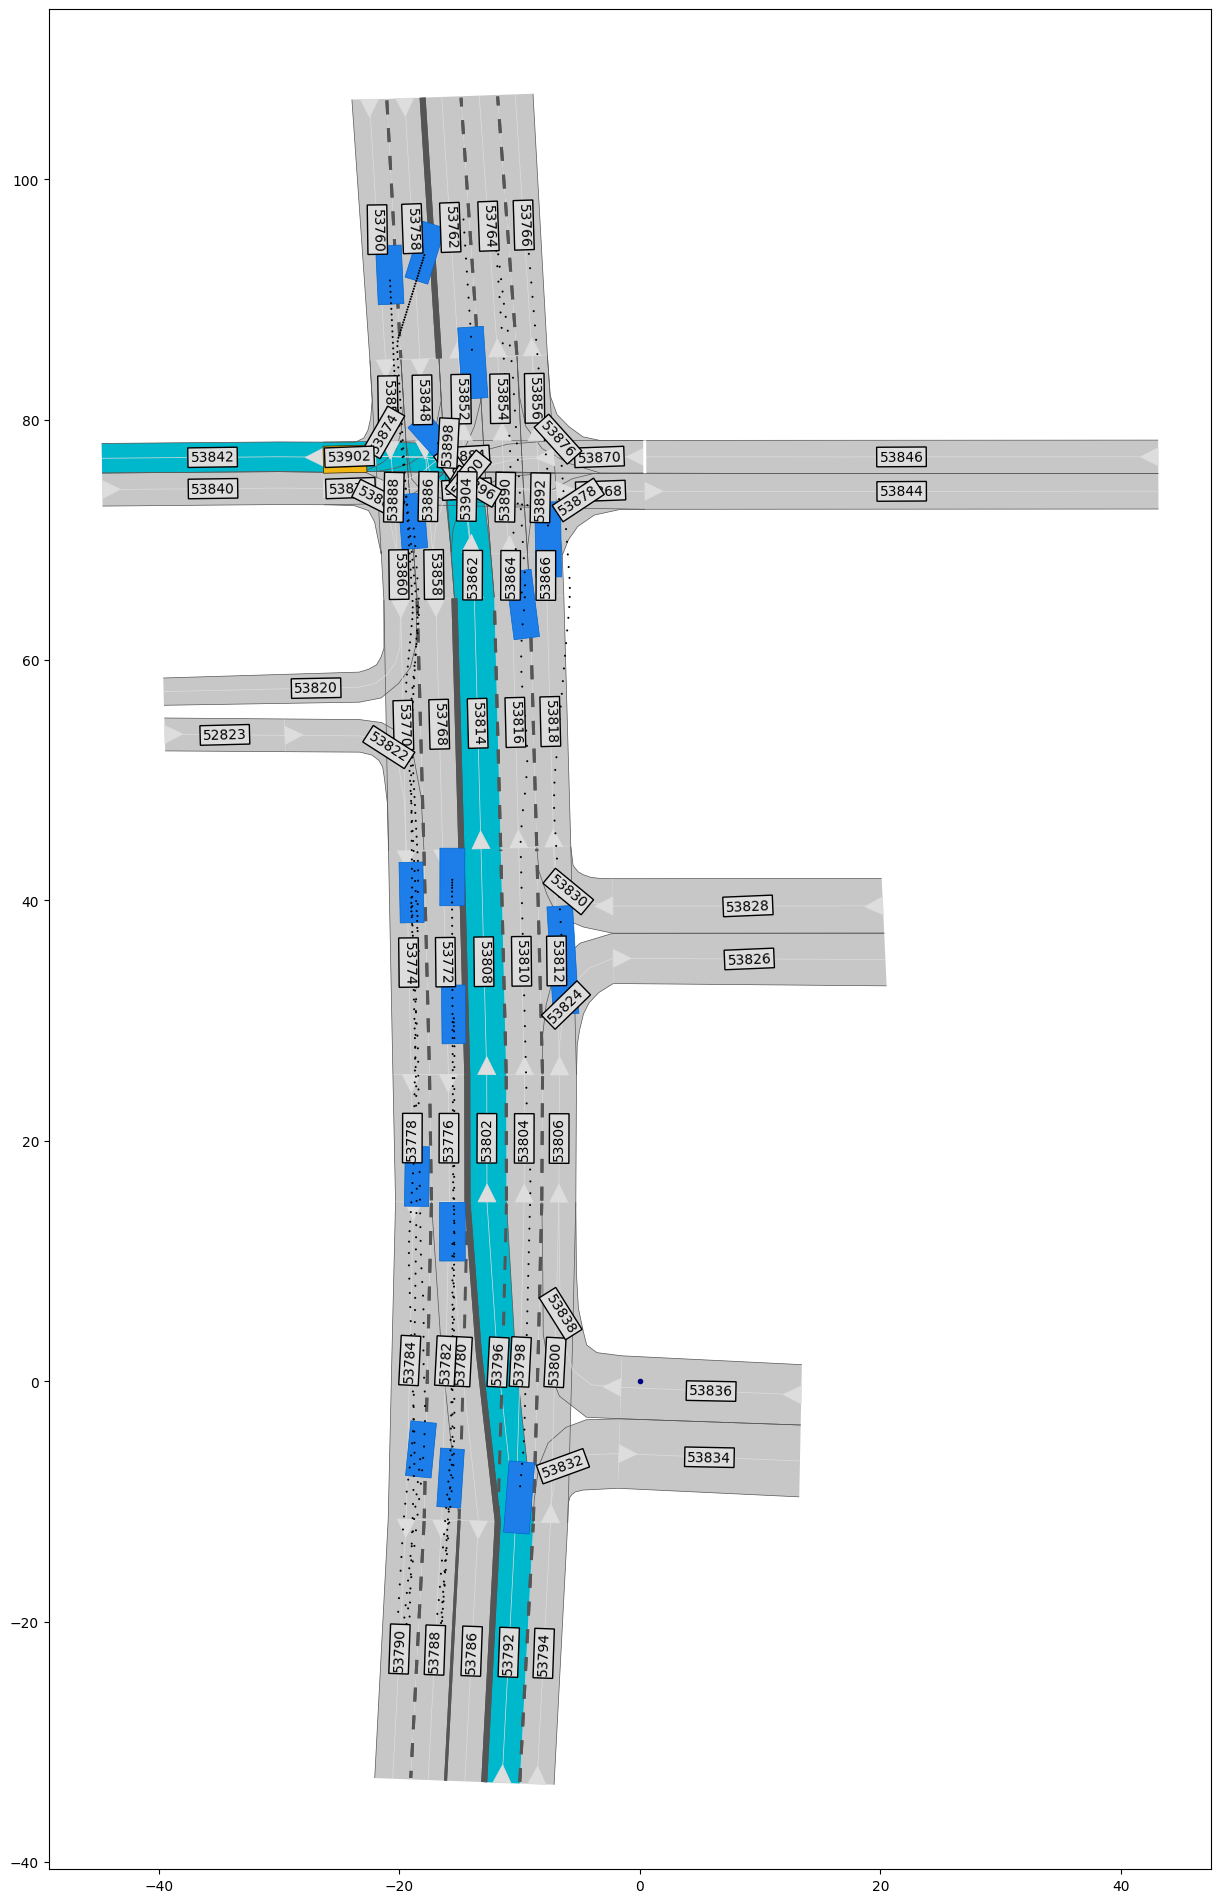

In [8]:
# Plot the scenario
plt.figure(figsize=(15, 30), dpi=100)
draw_object(scenario, draw_params={'time_begin': 0, 'scenario': {'lanelet_network': {
                        'lanelet': {'show_label': True}}}})

# Plot the ccosy
draw_object(lanelet_ccosy.lanelet, draw_params={'lanelet': {
                # 'left_bound_color': '#0de309',
                # 'right_bound_color': '#0de309',
                # 'center_bound_color': '#0de309',
                'unique_colors': False,  
                'draw_stop_line': False,
                'stop_line_color': '#ffffff',
                'draw_line_markings': False,
                'draw_left_bound': False,
                'draw_right_bound': False,
                'draw_center_bound': False,
                'draw_border_vertices': False,
                'draw_start_and_direction': False,
                'show_label': False,
                'draw_linewidth': 0.5,
                'fill_lanelet': True,
                'facecolor': '#00b8cc'
            }})
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()

### Step 4: Project position to the lanelet

Now, we can convert coordinates from the Cartesian frame to the lanelet-based curvilinear coordinate system and backwards.

In [9]:
import numpy as np

def project_and_plot(lanelet_ccosy, position):
    print(f"Orginal position: {position}")
    
    p_curvilinear, relative_position = lanelet_ccosy.get_extrapolated_curvi_coords(position)
    print(f"Converted curvilinear position: {p_curvilinear}, relative position: {relative_position}")
    
    p_cartesian = lanelet_ccosy.get_extrapolated_cartesian_coords(p_curvilinear)
    print(f"Backconverted cartesian position: {p_cartesian}")
    
    lanelet_point, relative_position = lanelet_ccosy.get_extrapolated_cartesian_coords(np.array([p_curvilinear[0], 0]))
    print(f"Projected point on the lanelet: {lanelet_point}, relative position: {relative_position}")

    
    # Plot the scenario
    plt.figure(figsize=(15, 30), dpi=100)
    draw_object(scenario, draw_params={'time_begin': 0, 'scenario': {'lanelet_network': {
                            'lanelet': {'show_label': True}}}})
    
    # Plot the ccosy
    draw_object(lanelet_ccosy.lanelet, draw_params={'lanelet': {
                    # 'left_bound_color': '#0de309',
                    # 'right_bound_color': '#0de309',
                    # 'center_bound_color': '#0de309',
                    'unique_colors': False,  
                    'draw_stop_line': False,
                    'stop_line_color': '#ffffff',
                    'draw_line_markings': False,
                    'draw_left_bound': False,
                    'draw_right_bound': False,
                    'draw_center_bound': False,
                    'draw_border_vertices': False,
                    'draw_start_and_direction': False,
                    'show_label': False,
                    'draw_linewidth': 0.5,
                    'fill_lanelet': True,
                    'facecolor': '#00b8cc'
                }})
    draw_object(planning_problem_set)
    plt.plot([position[0], lanelet_point[0]], [position[1], lanelet_point[1]], zorder=100, linewidth=2, marker='o')
    plt.gca().set_aspect('equal')
    plt.show()




Orginal position: [0 0]
Converted curvilinear position: [ 32.3190381  -11.53136995], relative position: LongitudinalRelativePointPosition.InDomain
Backconverted cartesian position: (array([-2.87858626e-11,  2.90309332e-10]), <LongitudinalRelativePointPosition.InDomain: 0>)
Projected point on the lanelet: [-11.4750925  -1.1378686], relative position: LongitudinalRelativePointPosition.InDomain


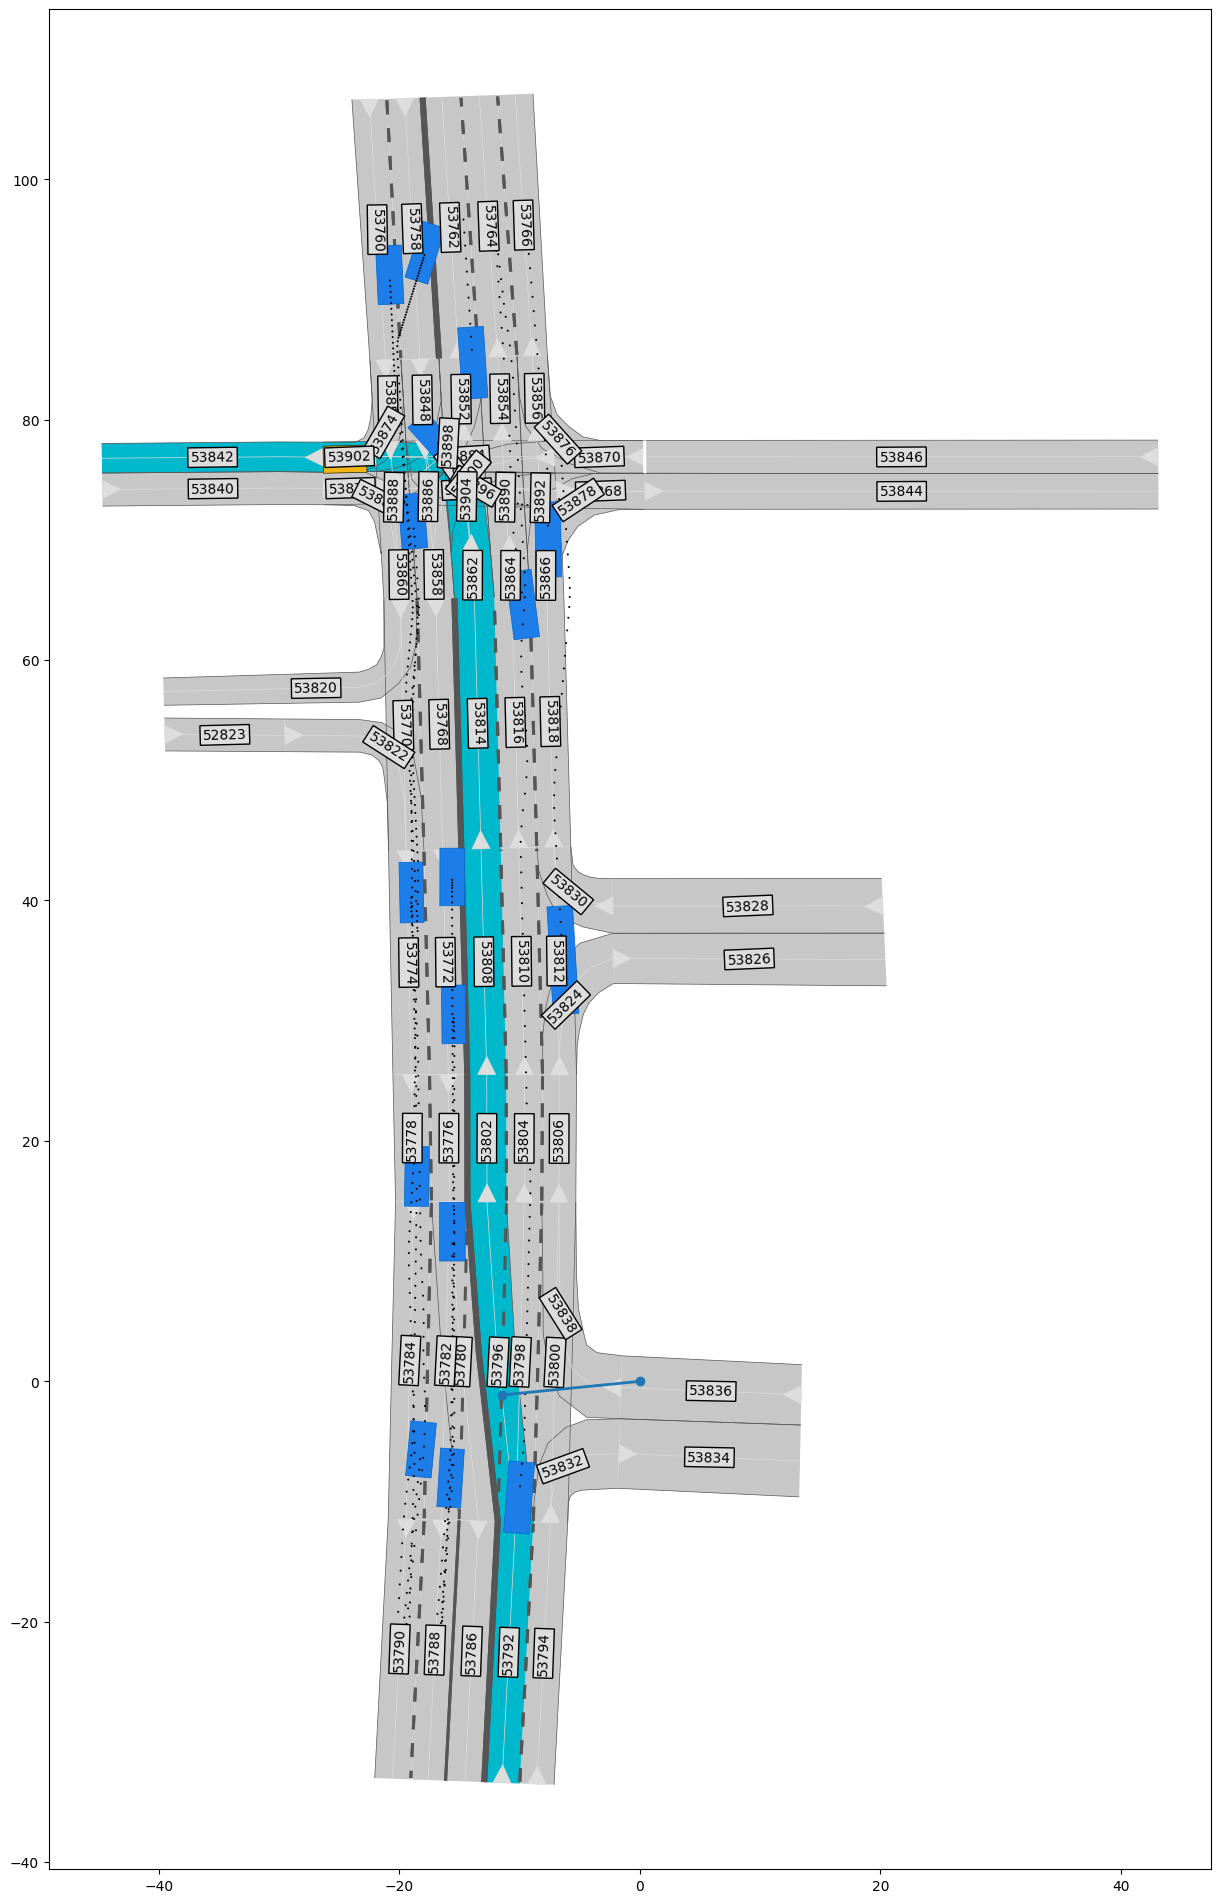

In [10]:
cartesian_position = np.array([0, 0])
project_and_plot(lanelet_ccosy, cartesian_position)

### Step 5: Project positions from outside of the projection domain

Now, we can convert coordinates from the Cartesian frame to the lanelet-based curvilinear coordinate system and backwards.


Orginal position: [  0 -40]
Converted curvilinear position: [ -5.99926809 -11.7980171 ], relative position: LongitudinalRelativePointPosition.BeforeDomain
Backconverted cartesian position: (array([  0., -40.]), <LongitudinalRelativePointPosition.BeforeDomain: -1>)
Projected point on the lanelet: [-11.78206487 -39.3866853 ], relative position: LongitudinalRelativePointPosition.BeforeDomain


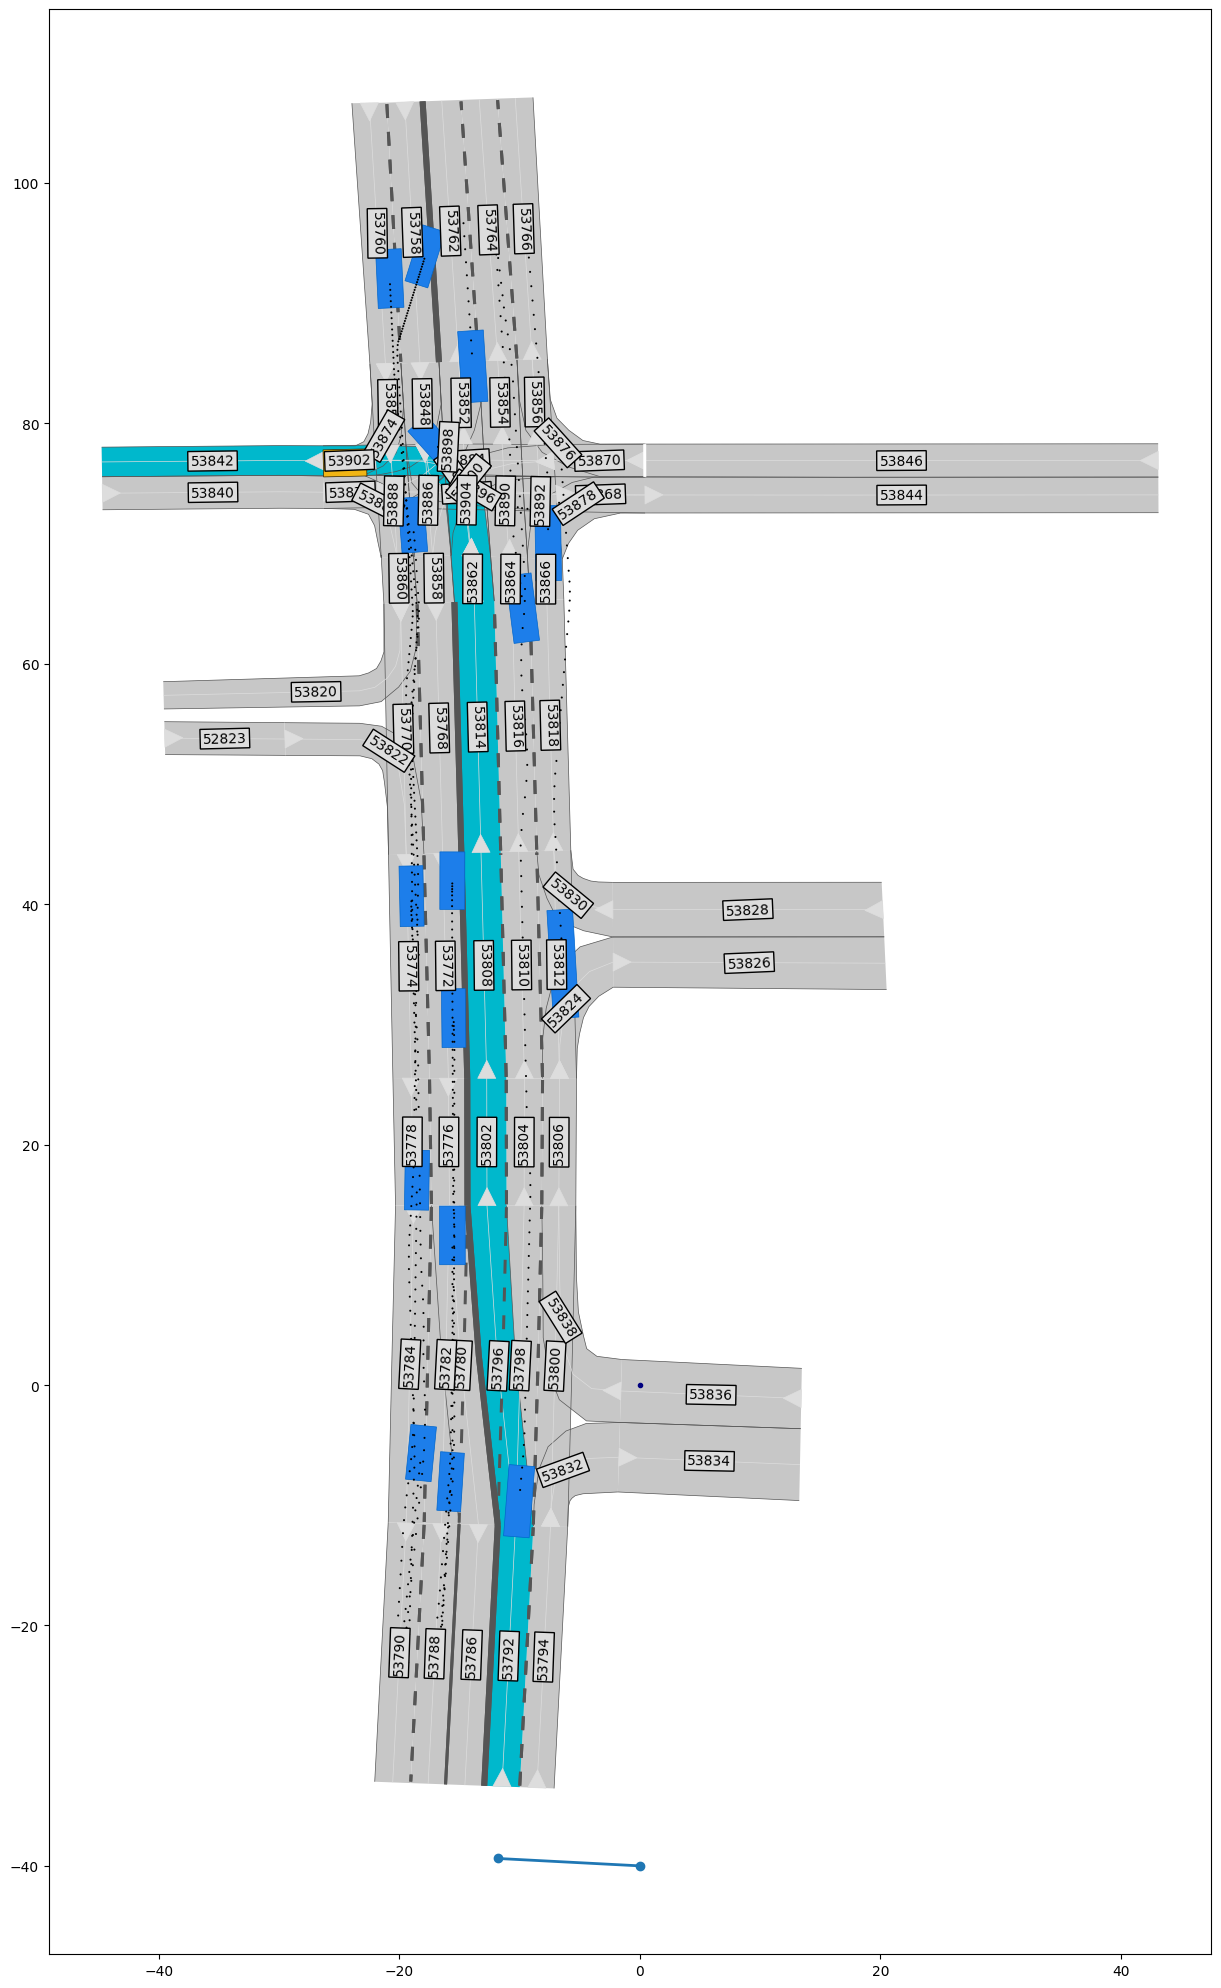

In [11]:
cartesian_position = np.array([0, -40])
project_and_plot(lanelet_ccosy, cartesian_position)